<a href="https://colab.research.google.com/github/mylee99125/CS-Final-Semester/blob/main/%5B%EC%BD%94%EB%93%9C_1_1%5D_Perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 퍼셉트론을 이용한 붓꽃 식별

[1] 필요한 패키지 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

[2] 데이터 준비 함수 정의하기
- 붓꽃 데이터의 특징과 레이블을 각각 numpy 배열 형태로 반환
    - 특징: 꽃잎의 길이와 폭
    - 레이블: target에 지정된 종류의 붓꽃이면 1, 그 외의 종류이면 0으로 지정

In [ ]:
def prepare_data(target):
    iris = load_iris()                     # iris data set 읽기
    X_tr = iris.data[:, 2:]             # 4개의 특징 중 꽃잎의 길이와 폭 선택
    labels = iris.target_names    # 'setosa', 'versicolor', 'virginica'
    y = iris.target

    # 학습표본의 레이블 지정 - target에 지정된 레이블이면 1, 그 외는 0
    y_tr = []
    for i in range(150):
        y_tr.append(labels[y[i]] == target)
    y_tr = np.array(y_tr, dtype=int)
    return X_tr, y_tr, ['(1) '+target, '(0) the others']

[3] 활성함수 - 단위 계단 함수
- 단위 계단 함수: x가 0 이상이면 1, 그렇지 않으면 0을 반환

In [ ]:
def step(x):
    return int(x >= 0)

[4] 퍼셉트론 클래스 선언
- 인스턴스 변수
    - self.dim: 입력층 입력의 수
    - self.activation: 활성함수
    - self.w: 가중치
    - self.b: 바이어스

In [ ]:
class Perceptron():
    # 퍼셉트론 객체 초기화
    def __init__(self, dim, activation):
        rnd = np.random.default_rng()
        self.dim = dim
        self.activation = activation
        # 가중치(w)와 바이어스(b)를 He normal 방식으로 초기화
        self.w = rnd.normal(scale = np.sqrt(2.0 / dim), size=dim)
        self.b = rnd.normal(scale = np.sqrt(2.0 / dim))

    # 가중치 및 바이어스 값 출력
    def printW(self):
        for i in range(self.dim):
            print('  w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('  b = {:6.3f}'.format(self.b))

    # numpy 배열 x에 저장된 표본의 출력 계산
    def predict(self, x):
        return np.array([self.activation(np.dot(self.w, x[i]) + self.b)
                          for i in range(len(x))])

    # 주어진 학습표본 집합을 이용하여 퍼셉트론 객체를 훈련함
    def fit(self, X, y, N, epochs, eta=0.01):
        # 학습표본의 인덱스를 무작위 순서로 섞음
        idx = list(range(N))
        np.random.shuffle(idx)
        X = np.array([X[idx[i]] for i in range(N)])
        y = np.array([y[idx[i]] for i in range(N)])

        f = 'Epochs = {:4d}    Loss = {:8.5f}'
        print('w의 초깃값  ', end='')
        self.printW()
        for j in range(epochs):
            for i in range(N):
                # x[i]에 대한 출력 오차 계산
                delta = self.predict([X[i]])[0] - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            # 학습 과정 출력
            if j < 10 or (j+1) % 100 == 0:
                loss = self.predict(X) - y
                loss = (loss * loss).sum() / N
                print(f.format(j+1, loss), end='')
                self.printW()

[5] 퍼셉트론의 분류 결과 시각화
- net: 학습된 퍼셉트론
- X, y: 특징 및 레이블의 배열
- multi_class: 3개 이상의 클래스로 분류하는 경우 True
- labels: 클래스 레이블 리스트
- class_id: 클래스 이름을 출력할 스트링 리스트
- colors: 클래스를 구분할 색상 리스트
- xlabel, ylabel: x, y축에 표시할 레이블
- legend_loc: 범례를 표시할 위치

In [ ]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
               xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 0.05 간격의 좌표값으로 나열
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
    y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)

    # x_lin과 y_lin의 격자좌표의 x와 y 값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k])
                            for k in range(len(y_hat))], dtype=int)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))

    # 출력할 그래프의 수평/수직 범위 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                     c = c, s = 5, alpha = 0.3, edgecolors = 'none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1],
                     c = c, s = 20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()

[6] 훈련 데이터 준비하기

In [ ]:
nSamples = 150
nDim = 2
target = 'setosa'         # 식별하고자 하는 붓꽃 종류 지정
X_tr, y_tr, labels = prepare_data(target)

[7] 퍼셉트론 객체 생성 및 학습

In [ ]:
p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, nSamples, epochs=1000, eta=0.01)

w의 초깃값    w1 = -0.093  w2 =  0.334  b =  1.978
Epochs =    1    Loss =  0.00667  w1 = -0.617  w2 =  0.164  b =  1.858
Epochs =    2    Loss =  0.00667  w1 = -0.647  w2 =  0.153  b =  1.848
Epochs =    3    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    4    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    5    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    6    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    7    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    8    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =    9    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =   10    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =  100    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =  200    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =  300    Loss =  0.00000  w1 = -0.677  w2 =  0.142  b =  1.838
Epochs =  400    Loss =  0.000

[8] 특징 공간 결정 영역 시각화

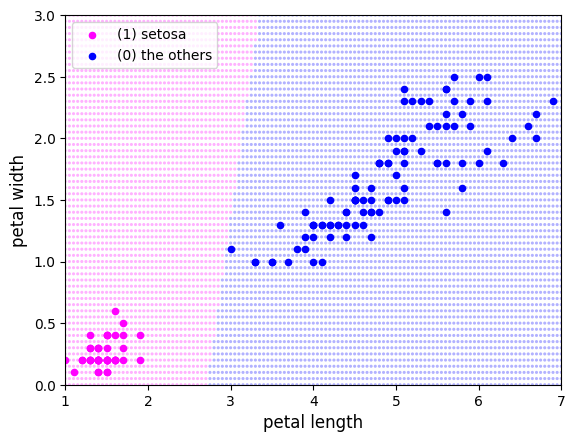

In [ ]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='petal length',
          ylabel='petal width',
          legend_loc='upper left')